In [150]:
# Importing all libraries necessary to run this notebook

import pandas as pd
import numpy as np
import datetime
from math import pi, ceil
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
#pp = pprint.PrettyPrinter()

# Obtained cid, secret_id and username from Spotify's Developer account
cid = '5fd46161069742bda7137da316ab55bb'
secret = '92176a20d05b48709224c0bbfa889805'
username = "utsav507"
uri = 'http://localhost:8888/notebooks/music-viz.ipynb'

# SpotiPy is Spotify's library
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Get read access to your library
scope = 'user-library-read'
token = util.prompt_for_user_token(username, scope, cid, secret, uri)
if token:
    sp = spotipy.Spotify(auth=token)
else:
    print("Can't get token for ", username)

In [151]:
print(token)

BQCYzLicYRIYE9-F2BtyGJQpf2j6wpTcn-Bu3iLk8eTXYfa9Zym3XcwbxHZVwcDMehsh1sqjzbY8xedlKlBJUec0TJcO4Ml10i1cJKa4byjpHFJBOkQNZrCffJ1dbHNLZ0eYoJWnJQ5CTIc4U0uTDS0esGiG7EBXT6GBGbiV2JprfzSHEmg


In [28]:
# Declaring empty dataframe, empty string, and empty lists
df_saved_tracks = pd.DataFrame()
track_list = ''
added_ts_list = []
artist_list = []
title_list = []

# Since SpotiPy only returns 100 records at a time, more_songs variable enables a while loop to fetch all tracks 
# user's current saved tracks. The offset_index stores the index of the track/record.
more_songs = True
offset_index = 0

# Data wrangling from different API calls and compiling into one dataframe
while more_songs:
    songs = sp.current_user_saved_tracks(offset=offset_index)
    #print(songs)
    for song in songs['items']:
        #print(song)
        #join track ids to a string for audio_features function
        track_list += song['track']['id'] +','
        #get the time when the song was added
        added_ts_list.append(song['added_at'])
        #get the title of the song
        title_list.append(song['track']['name'])
        #get all the artists in the song
        artists = song['track']['artists']
        artists_name = ''
        for artist in artists:
            artists_name += artist['name']  + ','
        artist_list.append(artists_name[:-1])
    #get the track features and append into a dataframe
    track_features = sp.audio_features(track_list[:-1])
    #print(track_features)
    df_temp = pd.DataFrame(track_features)
    #print(df_temp.head())
    df_saved_tracks = df_saved_tracks.append(df_temp)
    track_list = ''
    if songs['next'] == None:
        # no more songs in playlist
        more_songs = False
    else:
        # get the next n songs
        offset_index += songs['limit']

In [29]:
#include timestamp added, title and artists of a song
df_saved_tracks['added_at'] = added_ts_list
df_saved_tracks['song_title'] = title_list
df_saved_tracks['artists'] = artist_list

In [59]:
#df_saved_tracks.head()
#df_saved_tracks.describe()
#list(df_saved_tracks)
#df_saved_tracks.shape
df_saved_tracks.head()

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,...,speechiness,tempo,time_signature,track_href,type,uri,valence,added_at,song_title,artists
0,0.1330,https://api.spotify.com/v1/audio-analysis/5AbE...,0.661,220000,0.764,5AbEYl6Ij4pyF6YGZ3wi38,0.223000,11,0.121,-6.857,...,0.0412,149.971,4,https://api.spotify.com/v1/tracks/5AbEYl6Ij4py...,audio_features,spotify:track:5AbEYl6Ij4pyF6YGZ3wi38,0.390,2019-07-18T02:14:13Z,Many Words,DROELOE
1,0.5010,https://api.spotify.com/v1/audio-analysis/4Too...,0.432,206727,0.850,4ToogKQq58R9TvO40qRuxi,0.000007,10,0.203,-4.417,...,0.0771,82.607,4,https://api.spotify.com/v1/tracks/4ToogKQq58R9...,audio_features,spotify:track:4ToogKQq58R9TvO40qRuxi,0.109,2019-07-17T01:28:10Z,I Wanna Know,"RL Grime,Daya"
2,0.1020,https://api.spotify.com/v1/audio-analysis/1Slt...,0.531,302640,0.668,1SltT96uaxy887m1psaZZ0,0.000000,9,0.218,-4.486,...,0.0420,118.806,4,https://api.spotify.com/v1/tracks/1SltT96uaxy8...,audio_features,spotify:track:1SltT96uaxy887m1psaZZ0,0.161,2019-07-16T23:04:13Z,Light - GoSlo Remix,"San Holo,GOSLO"
3,0.0346,https://api.spotify.com/v1/audio-analysis/6KBO...,0.579,246464,0.707,6KBOBK0FQ5Ualqvg4IBAFc,0.000591,6,0.423,-6.947,...,0.0608,92.031,4,https://api.spotify.com/v1/tracks/6KBOBK0FQ5Ua...,audio_features,spotify:track:6KBOBK0FQ5Ualqvg4IBAFc,0.309,2019-07-16T23:01:41Z,It'll Be Okay (feat. Helen Tess),"SMLE,Helen Tess"
4,0.0213,https://api.spotify.com/v1/audio-analysis/0w4m...,0.759,226587,0.651,0w4m3Xp4svlIoyL94Zjlyd,0.000165,5,0.180,-8.317,...,0.0565,92.023,4,https://api.spotify.com/v1/tracks/0w4m3Xp4svlI...,audio_features,spotify:track:0w4m3Xp4svlIoyL94Zjlyd,0.471,2019-07-14T21:57:14Z,&Run,Sir Sly


In [36]:
# Define path to save dataframe
datapath = '/Users/utsav/Google Drive/Projects/music-rec/'

In [37]:
# Write dataframe to .h5 file format
df_saved_tracks.to_hdf(datapath + 'all_tracks.h5', key='df', mode='w')

In [60]:
# Write dataframe to a .csv file format
df_saved_tracks.to_csv(datapath + 'all_tracks.csv', sep='\t', encoding='utf-8')

In [46]:
# Importing dataframe to perform visualizaions

# Define a function to load dataframe, convert added_at to datatime object, and normalize tempo
def load_playlist(playlist='all_tracks.h5'):
    '''
    Takes in the path of the data.
    Reads the data, convertes added_at to a datetime object and extract year and month to new column.
    Also standardise the tempo to between 0 and 1.
    Returns a dataframe.
    '''

    # Read dataframe
    df_playlist = pd.read_hdf(datapath + playlist, key='df')
    df_playlist.drop(['analysis_url', 'track_href', 'uri', 'type'], axis=1, inplace=True)
    
    # Convert to datetime, and extract year and month from added_at
    df_playlist['added_at'] = pd.to_datetime(df_playlist['added_at'])
    df_playlist['added_year'] = df_playlist['added_at'].apply(lambda x : x.year)
    df_playlist['added_month'] = df_playlist['added_at'].apply(lambda x : x.month)
    df_playlist['added_week'] = df_playlist['added_at'].apply(lambda x : x.week)
    
    df_playlist['tempo_01'] = df_playlist['tempo'] / df_playlist['tempo'].max()
    
    return df_playlist

In [47]:
df_saved = load_playlist()
print(df_saved.shape)

(206, 21)


In [48]:
df_saved.sample(5)

,acousticness,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,...,tempo,time_signature,valence,added_at,song_title,artists,added_year,added_month,added_week,tempo_01
17,0.0608,0.452,268333,0.652,0s7I1uDviea9oaABY49jhY,0.144000,2,0.2650,-7.626,1,...,90.013,4,0.122,2019-04-01 17:59:55+00:00,Good Times,"Kyle Dixon,Kyle Dixon & Michael Stein,Christin...",2019,4,14,0.441615
10,0.0700,0.477,205053,0.981,3mMcONXl666919f7y6tA5j,0.000032,4,0.6480,-3.396,1,...,163.999,4,0.502,2018-04-05 01:27:25+00:00,Everywhere I Go (Kings and Queens),New Politics,2018,4,14,0.804599
14,0.6120,0.374,247731,0.082,4V89IXbcngfalUVUm21GNM,0.202000,1,0.1110,-11.402,0,...,91.428,1,0.037,2018-06-20 19:52:10+00:00,About You,xxyyxx,2018,6,25,0.448557
0,0.1330,0.661,220000,0.764,5AbEYl6Ij4pyF6YGZ3wi38,0.223000,11,0.1210,-6.857,1,...,149.971,4,0.390,2019-07-18 02:14:13+00:00,Many Words,DROELOE,2019,7,29,0.735776
0,0.1480,0.832,207640,0.410,6clpUb8RJOGqrB8CaJqZVN,0.773000,1,0.0969,-8.941,0,...,88.975,4,0.577,2018-01-31 23:50:30+00:00,Cosmic Giggle / Unbearable Compassion,Romo.,2018,1,5,0.436522


In [52]:
# Analyze change in taste of music over time

# Filter data to songs added after 2017 and before 2020
df_grp_ym = df_saved.groupby(['added_year','added_month']).mean().reset_index()
df_grp_ym = df_grp_ym[(df_grp_ym['added_year'] > 2017) & (df_grp_ym['added_year'] < 2020)]
df_grp_ym['added_at'] = df_grp_ym.apply(lambda row: datetime.date(int(row['added_year']), int(row['added_month']), 1), axis=1)
df_grp_ym.head()

,added_year,added_month,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,added_week,tempo_01,added_at
1,2018,1,0.189470,0.771000,185827.285714,0.457143,0.502216,1.571429,0.168143,-9.387286,0.714286,0.049743,106.885429,4.000000,0.399529,4.714286,0.524393,2018-01-01
2,2018,3,0.384855,0.586000,244738.000000,0.558500,0.002022,4.666667,0.124300,-9.220833,0.500000,0.123267,105.783167,4.000000,0.399333,10.000000,0.518985,2018-03-01
3,2018,4,0.277100,0.577600,258321.000000,0.631800,0.229865,6.000000,0.263520,-7.352200,1.000000,0.157080,116.486800,4.000000,0.391000,15.200000,0.571498,2018-04-01
4,2018,5,0.183690,0.463000,210100.000000,0.636500,0.000281,4.000000,0.185500,-7.220500,1.000000,0.046400,127.784000,4.000000,0.414500,20.000000,0.626924,2018-05-01
5,2018,6,0.163912,0.645732,219878.146341,0.575268,0.068276,5.512195,0.166985,-8.016805,0.487805,0.147495,122.375488,3.926829,0.386905,25.536585,0.600389,2018-06-01


<Figure size 2160x1440 with 0 Axes>

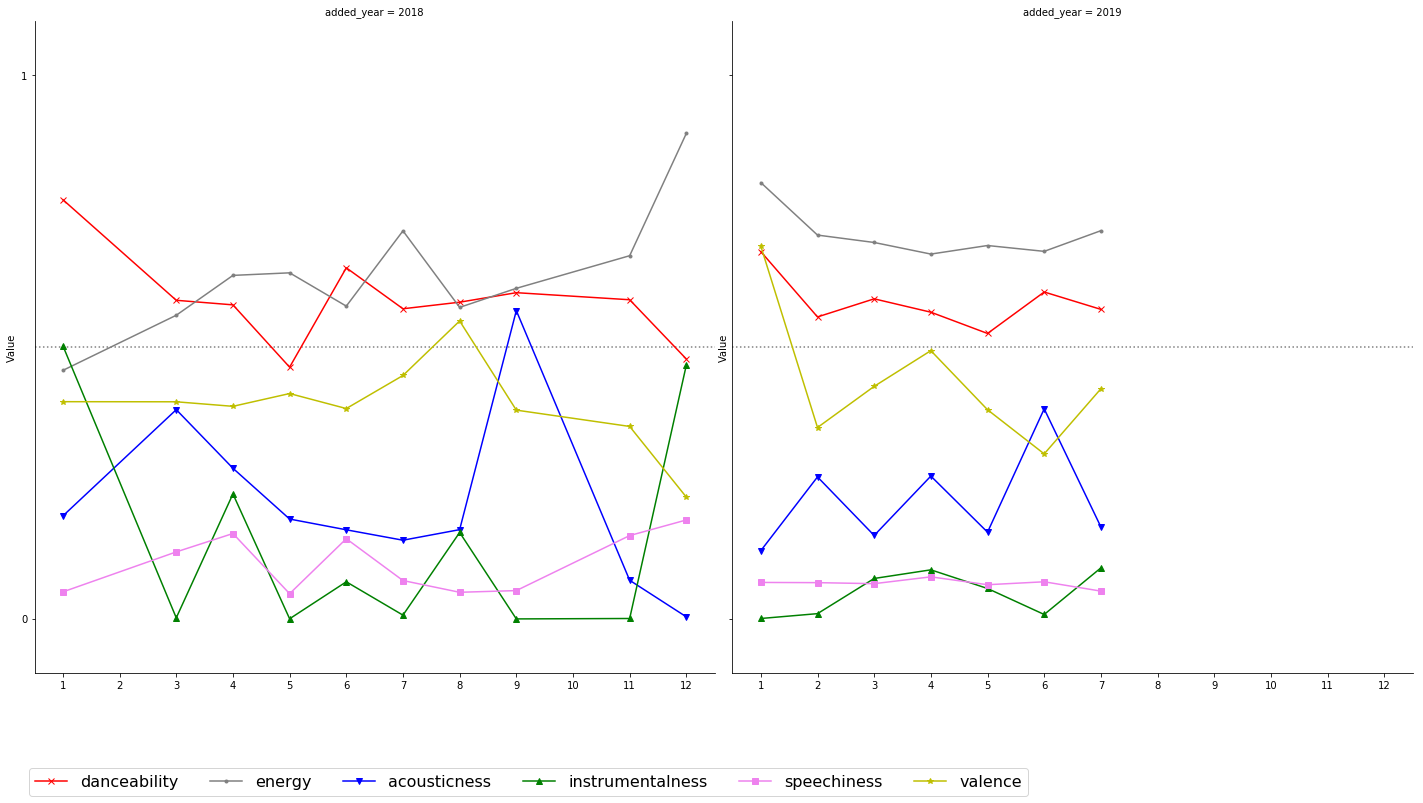

In [84]:
# Visualize audio features over time period (year)

# sns.set(style="ticks")
plt.figure(figsize=(30,20))
grid = sns.FacetGrid(data=df_grp_ym, col="added_year", height=10)

# Draw a horizontal line to show the starting point
grid.map(plt.axhline, y=0.5, ls=":", c=".5")

# Draw a line plot to show the average value per month
grid.map(plt.plot, "added_month", "danceability", marker="x", color='r', label='danceability')
grid.map(plt.plot, "added_month", "energy", marker=".", color='grey', label='energy')
grid.map(plt.plot, "added_month", "acousticness", marker="v", color='b', label='acousticness')
grid.map(plt.plot, "added_month", "instrumentalness", marker="^", color='g', label='instrumentalness')
grid.map(plt.plot, "added_month", "speechiness", marker="s", color='violet', label='speechiness')
grid.map(plt.plot, "added_month", "valence", marker="*", color='y', label='valence')

# Adjust the tick positions and labels
grid.set(xticks=np.arange(13), yticks=[0, 1], 
         xlim=(0.5,12.5), ylim=(-0.1,1.1), 
         ylabel='Value', xlabel='')

# Adjust legend
plt.legend(loc='lower center', bbox_to_anchor=(-0.3, -0.2), ncol=6, fontsize=16)


plt.show()

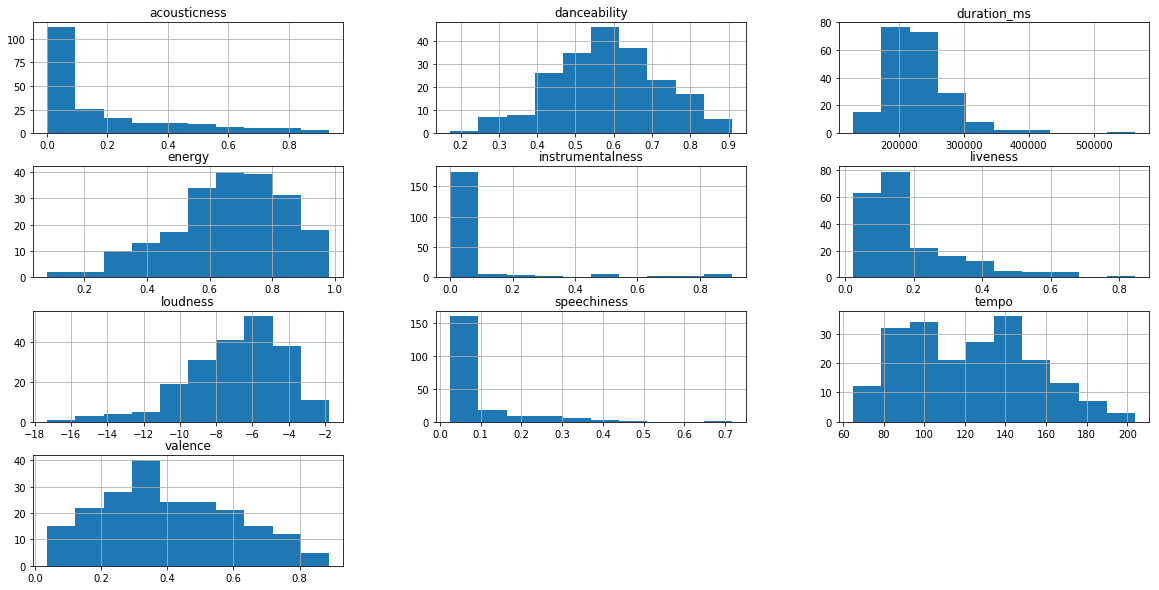

In [99]:
# Histogram describing audio features of dataset

df_saved[['acousticness', 'danceability', 'instrumentalness', 
           'energy', 'speechiness','tempo','valence','duration_ms',
           'liveness', 'loudness']].hist(figsize=(20,10))
plt.show()

In [100]:
# Clustering similar songs together

cluster_features = ['acousticness', 'danceability', 'instrumentalness', 
           'energy', 'speechiness','tempo','valence','duration_ms',
           'liveness', 'loudness']
df_cluster = df_saved[cluster_features]

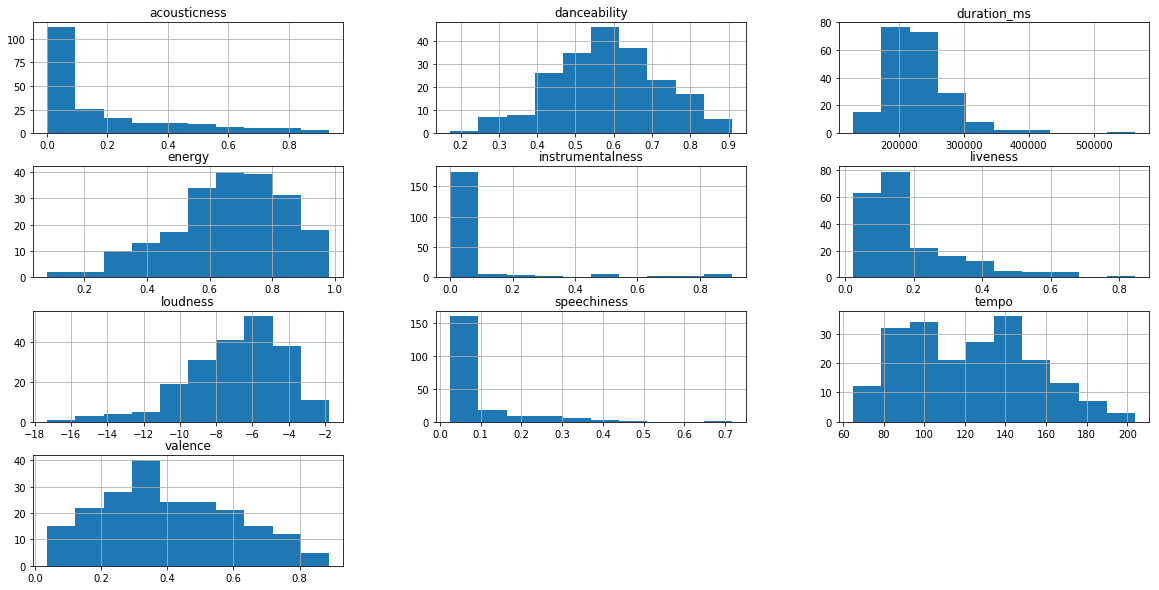

In [101]:
# Histogram describing audio features of clustered songs in the dataset

df_cluster.hist(figsize=(20,10))
plt.show()

In [102]:
X = np.array(df_cluster)
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [103]:
ss_dist = []
K = range(1, 11)
for k in K:
    km = KMeans(n_clusters=k, max_iter=10000, init='k-means++', random_state=123)
    km = km.fit(X)
    ss_dist.append(km.inertia_)

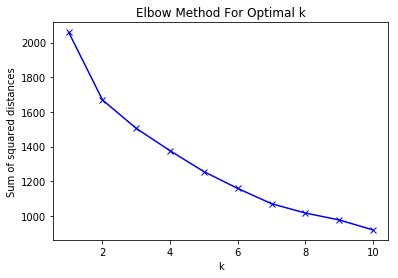

In [104]:
plt.plot(K, ss_dist, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [105]:
num_clusters = 9
kmeanModel = KMeans(n_clusters=num_clusters, max_iter=10000, init='k-means++', random_state=123).fit(X)

In [106]:
# Visualization of Cluster using PCA

pca = PCA(n_components=3, random_state=123)
pca_results = pca.fit_transform(X)

In [107]:
print(pca.explained_variance_ratio_.sum())
pca.explained_variance_ratio_.cumsum()

0.5465448978461145


array([0.25958395, 0.42319276, 0.5465449 ])

In [108]:
df_scree = pd.DataFrame({'Component': ['1','2','3'],'Indiv':pca.explained_variance_ratio_})
df_scree['cum_sum'] = df_scree['Indiv'].cumsum()
df_scree

,Component,Indiv,cum_sum
0,1,0.259584,0.259584
1,2,0.163609,0.423193
2,3,0.123352,0.546545


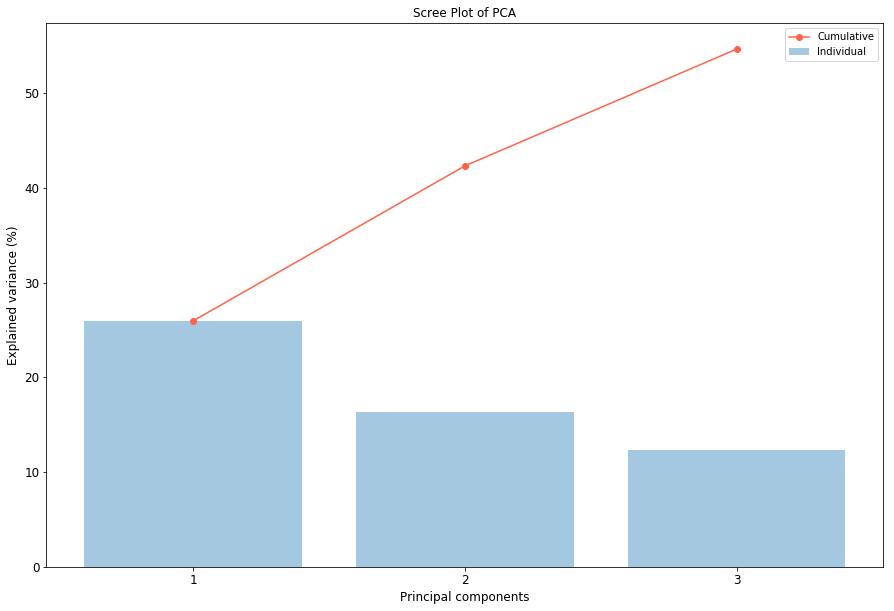

In [109]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, 
        label='Individual', axes=ax, alpha=0.4)
plt.plot(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_.cumsum(), 
         label='Cumulative', color='tomato', axes=ax, marker='o')

ax.set_xticks(range(0,3))
ax.set_xticklabels(range(1,4), fontsize=12)
ax.set_yticklabels(range(0,90,10), fontsize=12)

plt.title('Scree Plot of PCA', fontsize=12)
plt.ylabel('Explained variance (%)', fontsize=12)
plt.xlabel('Principal components', fontsize=12)
plt.legend()
plt.show()

In [110]:
df_pca = pd.DataFrame(pca_results)
df_pca.columns = ['PC1', 'PC2','PC3']
df_pca['label'] = kmeanModel.labels_
df_pca.head()

,PC1,PC2,PC3,label
0,-0.332464,-0.171969,-0.630829,0
1,-0.283292,0.636495,0.226150,5
2,-0.842490,1.394614,-0.133306,5
3,-0.483049,0.269224,0.561619,1
4,0.479059,-1.136420,-0.341029,8


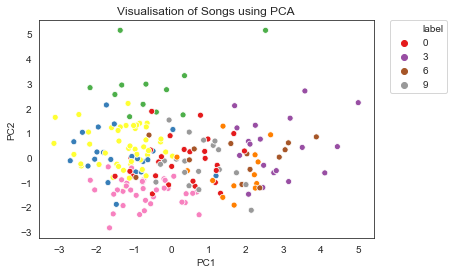

In [117]:
sns.set_style('white')
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='label', palette='Set1') # add different markers
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Visualisation of Songs using PCA')
plt.show()

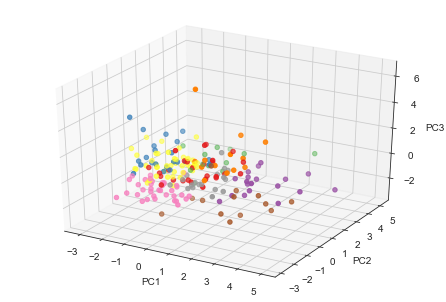

In [118]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'],
           c=df_pca['label'], cmap='Set1')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

In [119]:
# Visualisation of clusters using TSNE

tsne = TSNE(n_components=2, perplexity=50, n_iter=5000, random_state=123, learning_rate=190)
tsne_results = tsne.fit_transform(X)

In [120]:
df_tsne = pd.DataFrame(tsne_results)
df_tsne.columns = ['D1', 'D2']
df_tsne['label'] = kmeanModel.labels_
df_tsne.head()

,D1,D2,label
0,-0.775243,-1.258615,0
1,2.989342,3.940285,5
2,-3.650277,-1.333408,5
3,1.198240,3.362406,1
4,3.330226,-0.743153,8


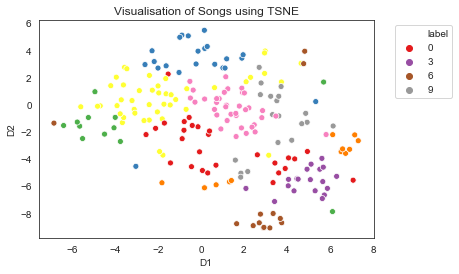

In [122]:
sns.set_style('white')
sns.scatterplot(data=df_tsne, x='D1', y='D2', hue='label', palette='Set1')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.title('Visualisation of Songs using TSNE')
plt.show()

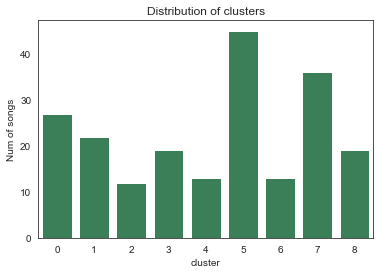

In [126]:
# assign label to recent dataframe
df_saved.loc[:,'cluster'] = kmeanModel.labels_
df_cluster_size = df_saved.groupby('cluster').size().reset_index(name='Num of songs')
sns.barplot(data=df_cluster_size, x='cluster', y='Num of songs', color='seagreen')
plt.title('Distribution of clusters')
plt.show()

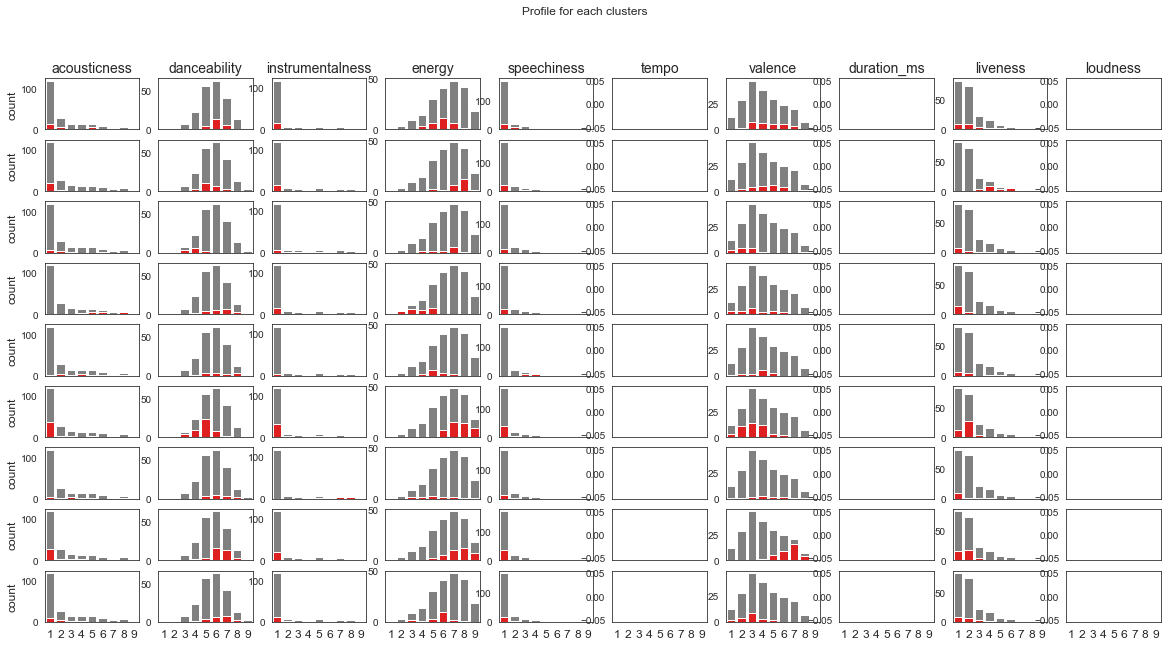

In [128]:
# Song feature distribution compared to overall distribution

# set binning intervals of 0.1
bins = np.linspace(0,1,10)

# create subplots
num_features = len(cluster_features)
f, axes = plt.subplots(num_clusters, num_features, 
                       figsize=(20, 10), sharex='col')

# initialise 1st row. Representing cluster
row = 0
for cluster in np.sort(df_saved['cluster'].unique()):
#     filter cluster dataframe and reset column to 0 for 1st plot for the cluster
    df_cluster = df_saved[df_saved['cluster'] == cluster]
    col = 0
    
    for feature in cluster_features:
#         create binned count for all recent df and clustered df
        rec_grp = df_saved.groupby(pd.cut(df_saved[feature], bins)).size().reset_index(name='count')
        cluster_grp = df_cluster.groupby(pd.cut(df_cluster[feature], bins)).size().reset_index(name='count')
        
#         plot overall distribution and cluster distribution on the ax
        sns.barplot(data=rec_grp, x=feature, y='count', 
                    color='grey', ax=axes[row, col])
        sns.barplot(data=cluster_grp, x=feature, y='count', 
                    color='red', ax=axes[row, col])
        
#         configure ax
        axes[row, col].set_xlabel('')
        axes[row, col].set_xticklabels(range(1,10), fontsize=12)
        if col > 0:
            axes[row, col].set_ylabel('')
        else:
            axes[row, col].set_ylabel('count', fontsize=12)
        if row == 0:
            axes[row, col].set_title(feature, fontsize=14)        
        col += 1
    row += 1
    
f.suptitle('Profile for each clusters')
    
plt.show()

In [130]:
# Average song features per cluster

# calculate mean of each variable
radar_col = cluster_features + ['cluster']

# feature average for each cluster as a radar chart
df_radar = df_saved[radar_col]
df_radar = df_radar.groupby('cluster').mean().reset_index()
df_radar

,cluster,acousticness,danceability,instrumentalness,energy,speechiness,tempo,valence,duration_ms,liveness,loudness
0,0,0.225649,0.638593,0.010317,0.598556,0.089881,154.759148,0.452704,214502.555556,0.187141,-7.891778
1,1,0.044063,0.551136,0.026084,0.770318,0.076559,126.488955,0.440636,235881.545455,0.465136,-5.448091
2,2,0.163006,0.359167,0.179098,0.621750,0.042475,145.237083,0.258358,361421.000000,0.138825,-7.553667
3,3,0.600632,0.631053,0.032442,0.358526,0.056121,101.391105,0.303432,218377.105263,0.135411,-10.934474
4,4,0.366892,0.670462,0.007809,0.529077,0.359000,109.479308,0.341538,210770.692308,0.168877,-8.113308
5,5,0.085028,0.478600,0.038029,0.784067,0.071816,136.083711,0.294618,224032.933333,0.149320,-4.546911
6,6,0.265492,0.660231,0.746385,0.555154,0.056292,114.694615,0.443131,209203.000000,0.148131,-9.560077
7,7,0.096377,0.652750,0.008319,0.771028,0.054092,107.700889,0.671139,221736.111111,0.128167,-5.494083
8,8,0.126153,0.648474,0.015159,0.582053,0.068674,89.342737,0.272232,220295.947368,0.151000,-7.564000


In [138]:
# https://python-graph-gallery.com/392-use-faceting-for-radar-chart/
def make_radar(row, title, color, dframe, num_clusters):
    # number of variable
    categories=list(dframe)[1:]
    N = len(categories)
    
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    # Initialise the radar plot
    ax = plt.subplot(2,ceil(num_clusters/2),row+1, polar=True, )
    
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=14)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6], ["0.2","0.4","0.6","0.8","1.0","1.2","1.4","1.6"], color="grey", size=8)
    plt.ylim(0,1)

    # Ind1
    values=dframe.loc[row].drop('cluster').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=16, color=color, y=1.06)

IndexError: list index out of range

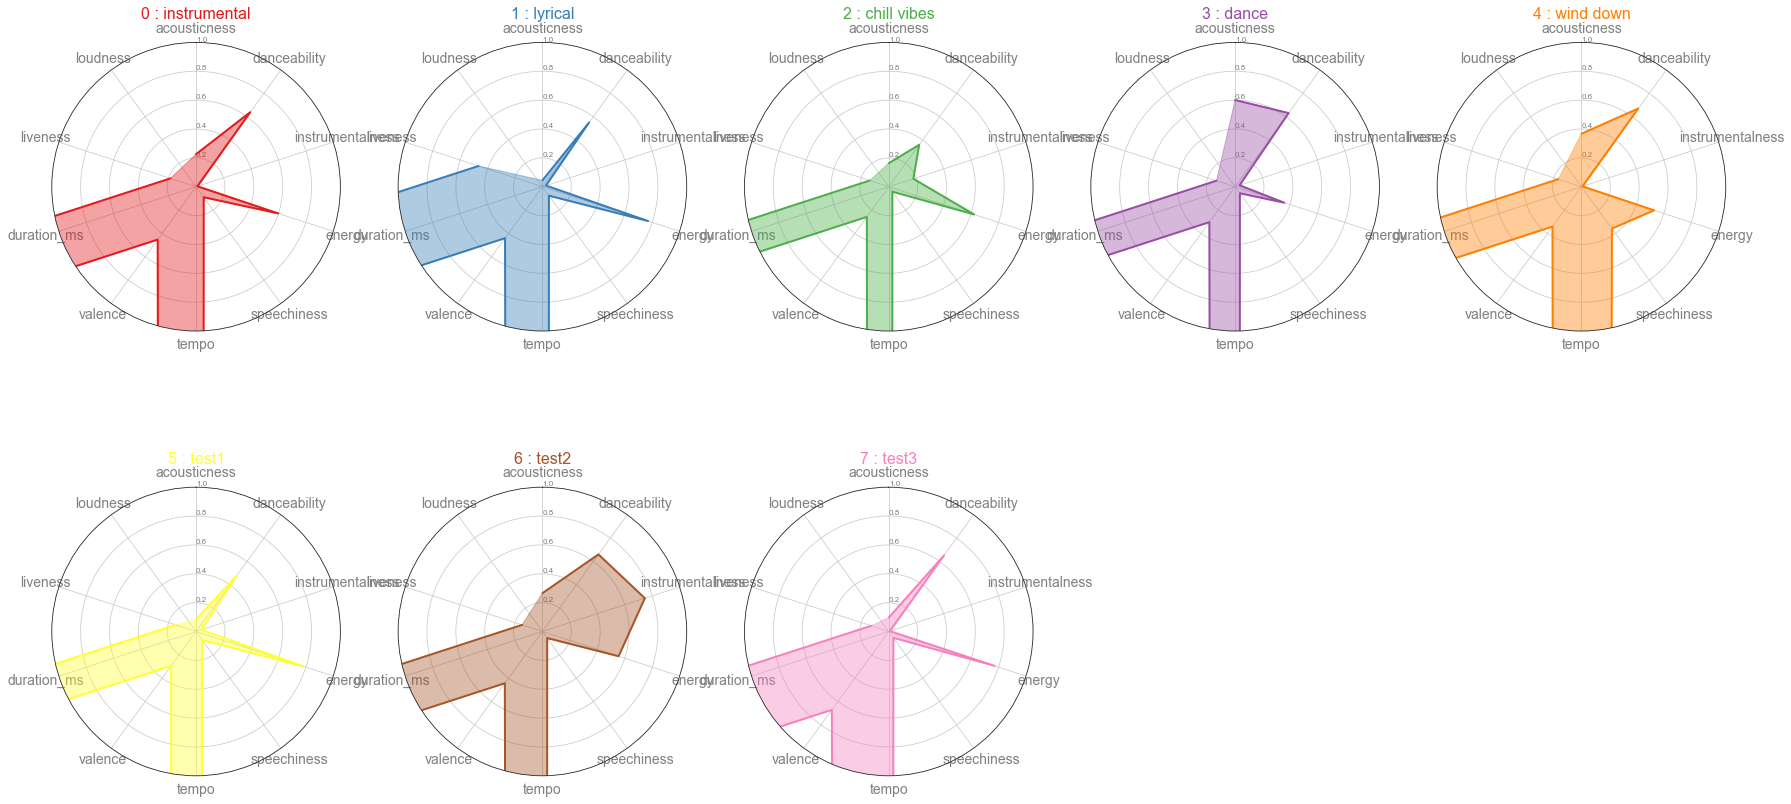

In [145]:
# initialize the figure
plt.figure(figsize=(30,15))
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set1", len(df_radar.index))

# Create cluster name
title_list = ['instrumental', 'lyrical', 'chill vibes', 'dance', 'wind down', 'test1', 'test2', 'test3']

# Loop to plot
for row in range(0, len(df_radar.index)):
    make_radar(row=row, title=str(df_radar['cluster'][row]) + ' : ' + title_list[row], 
               color=my_palette(row), dframe=df_radar, num_clusters=len(df_radar.index))

    
# Show plot
plt.show()

In [1]:
df_radar['cluster']

NameError: name 'df_radar' is not defined